In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data2=yf.download("META", start="2023-08-01" ,end= "2024-01-01")
data2


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-01,317.540009,324.140015,314.660004,322.709991,322.367950,22817900
2023-08-02,318.000000,318.390015,310.649994,314.309998,313.976868,20461100
2023-08-03,309.929993,315.950012,309.929993,313.190002,312.858063,15180200
2023-08-04,314.959991,318.410004,310.200012,310.730011,310.400665,17600200
2023-08-07,313.230011,317.070007,310.459991,316.559998,316.224487,16236500
...,...,...,...,...,...,...
2023-12-22,355.579987,357.200012,351.220001,353.390015,353.015472,11764200
2023-12-26,354.989990,356.980011,353.450012,354.829987,354.453918,9898600
2023-12-27,356.070007,359.000000,355.309998,357.829987,357.450714,13207900


In [6]:
data2["middle_band"]=data2["Close"].rolling(window=20).mean()

In [7]:
def bollinger_band(data2,period,n):
    # middle band 20 sma
    data2["middle_band"]=data2["Close"].rolling(window=20).mean()
    std=data2["Close"].rolling(window=period).std()
    data2["upper_band"]=data2["middle_band"]+n*std
    data2["lower_band"]=data2["middle_band"]-n*std

In [8]:
bollinger_band(data2,10,2)

In [9]:
data2

,Open,High,Low,Close,Adj Close,Volume,middle_band,upper_band,lower_band
Date,,,,,,,,,
2023-08-01,317.540009,324.140015,314.660004,322.709991,322.367950,22817900,NaN,NaN,NaN
2023-08-02,318.000000,318.390015,310.649994,314.309998,313.976868,20461100,NaN,NaN,NaN
2023-08-03,309.929993,315.950012,309.929993,313.190002,312.858063,15180200,NaN,NaN,NaN
2023-08-04,314.959991,318.410004,310.200012,310.730011,310.400665,17600200,NaN,NaN,NaN
2023-08-07,313.230011,317.070007,310.459991,316.559998,316.224487,16236500,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-12-22,355.579987,357.200012,351.220001,353.390015,353.015472,11764200,334.351501,354.605725,314.097278
2023-12-26,354.989990,356.980011,353.450012,354.829987,354.453918,9898600,335.358000,353.685899,317.030102
2023-12-27,356.070007,359.000000,355.309998,357.829987,357.450714,13207900,336.300000,354.902092,317.697908


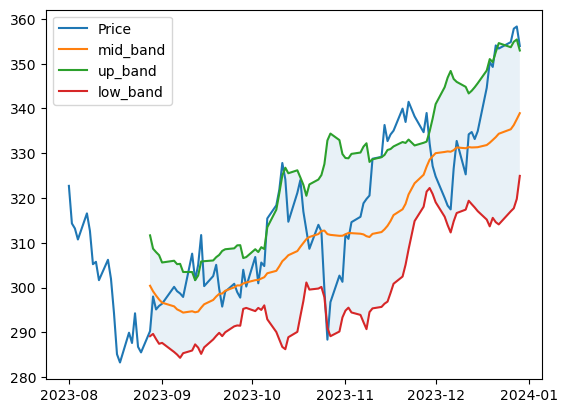

In [10]:
p1=plt.plot(data2["Close"],label="Price")
p2=plt.plot(data2["middle_band"],label="mid_band")
p3=plt.plot(data2["upper_band"],label="up_band")
p4=plt.plot(data2["lower_band"],label="low_band")
plt.legend()
plt.fill_between(data2.index,data2["upper_band"],data2["lower_band"],alpha=.1)

In [14]:
data2
df=data2

In [15]:
df["signal"]=0

In [ ]:
for index in range(0,len(df)):
    
